<a href="https://colab.research.google.com/github/creamcheesesteak/Project_Guardians/blob/master/project/ML/ML_b/cluster_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 전처리

In [ ]:
import pandas as pd

In [ ]:
df_2015 = pd.read_excel('2015년 업체별 명세서 주요정보.xlsx')

In [ ]:
df_2016 = pd.read_excel('2016년 업체별 명세서 주요정보.xlsx')

In [ ]:
df_2017 = pd.read_excel('(수정)2017년도 업체별 명세서 주요정보(업데이트)_18.12.20.기준.xls', header=2)

In [ ]:
df_2018 = pd.read_excel('(수정)2018년도 업체별 명세서 주요정보(업데이트)_19.08.08.기준.xls', header=2)

In [ ]:
df_2019 = pd.read_excel('(수정)2019년도 업체별 명세서 주요정보(업데이트)_20.11.26.기준(수정).xlsx')

In [ ]:
df_2020 = pd.read_excel('(수정)2020년도 업체별 명세서 주요정보_21.6.25기준(정정 최종).xlsx', header = 1)

In [ ]:
df_2019

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,관리업체별 명세서 제출 현황,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,구분,제출연도,관리업체,제출갯수,제출일자,비공개신청,재제출요청,검증보고서,센터제출일자,관리업체코드
...,...,...,...,...,...,...,...,...,...,...,...
618,NaN,항공,2019,아시아나항공,1,2019-07-01,NaN,NaN,O,NaN,M0051100001
619,NaN,항공,2019,에어부산(주),1,2019-07-04,NaN,NaN,O,NaN,M2200120013
620,NaN,항공,2019,제주항공(주),1,2019-03-29,NaN,NaN,O,NaN,M2400130002
621,NaN,항공,2019,주식회사 진에어,1,2019-03-29,NaN,NaN,O,NaN,M2400140003


In [ ]:
df_2019 = pd.read_excel('(수정2)2019년도 업체별 명세서 주요정보(업데이트)_20.11.26.기준(수정).xlsx')

In [ ]:
df_2019

In [ ]:
df_2015.info()
df_2016.info()
df_2017.info()
df_2018.info()
df_2019.info()
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   번호              864 non-null    int64 
 1   관장기관(주무관청)      864 non-null    object
 2   관리업체            864 non-null    object
 3   대상연도            864 non-null    int64 
 4   지정구분            864 non-null    object
 5   지정업종            864 non-null    object
 6   온실가스 배출량(tCO2)  860 non-null    object
 7   에너지 사용량(TJ)     860 non-null    object
 8   검증수행기관          860 non-null    object
 9   비고              6 non-null      object
dtypes: int64(2), object(8)
memory usage: 67.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   번호              898 non-null    int64  
 1   관장기관(주무관청)      898 non-null    object 
 2   관리업체            898 non-nu

In [ ]:
df_2015.rename(columns = {'온실가스 배출량(tCO₂eq)' : '온실가스 배출량(tCO2)'}, inplace = True)

In [ ]:
df_2015.columns = ['번호','관장기관(주무관청)','관리업체','대상연도','지정구분','지정업종','온실가스 배출량(tCO2)','에너지 사용량(TJ)','검증수행기관','비고']
df_2016.columns = ['번호','관장기관(주무관청)','관리업체','대상연도','지정구분','지정업종','온실가스 배출량(tCO2)','에너지 사용량(TJ)','검증수행기관','비고']
df_2017.columns = ['번호','관장기관(주무관청)','관리업체','대상연도','지정구분','지정업종','온실가스 배출량(tCO2)','에너지 사용량(TJ)','검증수행기관','비고']
df_2018.columns = ['번호','관장기관(주무관청)','관리업체','대상연도','지정구분','지정업종','온실가스 배출량(tCO2)','에너지 사용량(TJ)','검증수행기관','비고']
df_2019.columns = ['번호','관장기관(주무관청)','관리업체','대상연도','지정구분','지정업종','온실가스 배출량(tCO2)','에너지 사용량(TJ)','검증수행기관','비고']


In [ ]:
df_2015_to_2020 = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

In [ ]:
df_2015_to_2020

,번호,관장기관(주무관청),관리업체,대상연도,지정구분,지정업종,온실가스 배출량(tCO2),에너지 사용량(TJ),검증수행기관,비고
0,1,국토교통부,(주)강원랜드,2015.0,사업장,건물,71204,1393,한국표준협회,NaN
1,2,국토교통부,(주)국민은행,2015.0,업체,건물,121180,1828,한국표준협회,NaN
2,3,국토교통부,(주)대명레저산업,2015.0,사업장,건물,48533,973,한국표준협회,NaN
3,4,국토교통부,(주)무주덕유산리조트,2015.0,사업장,건물,20157,356,이큐에이㈜,NaN
4,5,국토교통부,(주)휘닉스중앙평창,2015.0,사업장,건물,22200,435,(주)한국경영인증원,NaN
...,...,...,...,...,...,...,...,...,...,...
1058,1059,환경부,효성화학 주식회사,2020.0,업체,산업,881811,18213,(재)한국품질재단,NaN
1059,1060,환경부,휴비스,2020.0,업체,산업,465138,6985,한국표준협회,NaN
1060,1061,환경부,휴켐스 주식회사,2020.0,사업장,산업,132580,1194,㈜한국품질보증원,NaN
1061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_2015_to_2020['비고'].unique()

array([nan, '2016년 명세서 공개심사 위원회 결정사항', '2018년 명세서 공개심사 위원회 결정사항',
       '2019년 명세서 공개심사 위원회 결정사항', '2021년 명세서 공개심사 위원회 결정사항'], dtype=object)

In [ ]:
df_2015_to_2020.drop(['비고'],axis=1,inplace=True)

In [ ]:
df_2015_to_2020

,번호,관장기관(주무관청),관리업체,대상연도,지정구분,지정업종,온실가스 배출량(tCO2),에너지 사용량(TJ),검증수행기관
0,1,국토교통부,(주)강원랜드,2015.0,사업장,건물,71204,1393,한국표준협회
1,2,국토교통부,(주)국민은행,2015.0,업체,건물,121180,1828,한국표준협회
2,3,국토교통부,(주)대명레저산업,2015.0,사업장,건물,48533,973,한국표준협회
3,4,국토교통부,(주)무주덕유산리조트,2015.0,사업장,건물,20157,356,이큐에이㈜
4,5,국토교통부,(주)휘닉스중앙평창,2015.0,사업장,건물,22200,435,(주)한국경영인증원
...,...,...,...,...,...,...,...,...,...
1058,1059,환경부,효성화학 주식회사,2020.0,업체,산업,881811,18213,(재)한국품질재단
1059,1060,환경부,휴비스,2020.0,업체,산업,465138,6985,한국표준협회
1060,1061,환경부,휴켐스 주식회사,2020.0,사업장,산업,132580,1194,㈜한국품질보증원
1061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_2015_to_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5832 entries, 0 to 1062
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   번호              5831 non-null   object 
 1   관장기관(주무관청)      5830 non-null   object 
 2   관리업체            5830 non-null   object 
 3   대상연도            5830 non-null   float64
 4   지정구분            5830 non-null   object 
 5   지정업종            5830 non-null   object 
 6   온실가스 배출량(tCO2)  5824 non-null   object 
 7   에너지 사용량(TJ)     5824 non-null   object 
 8   검증수행기관          5826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 455.6+ KB


In [ ]:
df_result = df_2015_to_2020.dropna()

In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5824 entries, 0 to 1060
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   번호              5824 non-null   object 
 1   관장기관(주무관청)      5824 non-null   object 
 2   관리업체            5824 non-null   object 
 3   대상연도            5824 non-null   float64
 4   지정구분            5824 non-null   object 
 5   지정업종            5824 non-null   object 
 6   온실가스 배출량(tCO2)  5824 non-null   object 
 7   에너지 사용량(TJ)     5824 non-null   object 
 8   검증수행기관          5824 non-null   object 
dtypes: float64(1), object(8)
memory usage: 455.0+ KB


In [ ]:
df_result['번호'].unique()

array([1, 2, 3, ..., 1059, 1060, 1061], dtype=object)

In [ ]:
print(df_result['번호'].unique(),
df_result['관장기관(주무관청)'].unique(),
df_result['관리업체'].unique(),
df_result['대상연도'].unique(),
df_result['지정구분'].unique(),
df_result['지정업종'].unique(),
df_result['온실가스 배출량(tCO2)'].unique(),
df_result['에너지 사용량(TJ)'].unique(),
df_result['검증수행기관'].unique(), sep='\n\n')


[1 2 3 ... 1059 1060 1061]

['국토교통부' '산업통상자원부' '환경부' '농림축산식품부' '해양수산부']

['(주)강원랜드' '(주)국민은행' '(주)대명레저산업' ... '주식회사 엘지에너지솔루션' '주식회사 케이씨씨실리콘'
 '한화솔루션 주식회사']

[2015. 2016. 2017. 2018. 2019. 2020.]

['사업장' '업체']

['건물' '광업' '기계' '디스플레이' '목재' '반도체' '집단에너지' '산업단지' '발전 · 에너지' '비철금속' '석유화학'
 '섬유' '수도' '시멘트' '유리 · 요업' '유리' '요업' '음식료품' '자동차' '전기전자' '정유' '제지' '조선'
 '철강' '통신' '폐기물' '항공' '건설' '교통(여객)' '교통(철도)' '교통(화물)' '교통(항공)' '교통(해운)'
 '반도체.디스플레이.전기전자' '발전에너지' '식료품 제조업' '음료제조업' '지정외 폐기물처리업' '지정외 폐기물처리업 등'
 '하수, 폐수 및 분뇨 처리업' '하수처리업' '산업' '담배제조업' '수송' '전환' '공공기타']

[71204 121180 48533 ... 881811 465138 132580]

[1393 1828 973 ... 18213 6985 1194]

['한국표준협회' '이큐에이㈜' '(주)한국경영인증원' '(재)한국품질재단' '(주)비에스아이그룹코리아' '환경보전협회'
 '㈜한국품질보증원' '㈜디엔브이지엘비즈니스어슈어런스코리아' '한국산업기술시험원' '티유브이슈드코리아㈜' '안진회계법인'
 '로이드인증원㈜' '한국생산성본부인증원(주)' '(주)신화엔지니어링종합건축사사무소' '대일이엔씨기술(주)' '한국가스안전공사'
 '(재)한국화학융합시험연구원' '산림조합중앙회' '지속가능인증원주식회사' '㈜한국경영인증원' '㈜디엔브이비즈니스어슈어런스코리아']


In [ ]:
pd.get_dummies(df_result['지정업종'])

In [ ]:
df_result.to_excel('2015-2020_업체별_명세서_주요정보.xlsx')

## 전처리 2 및 군집화

In [ ]:
import pandas as pd
df_result = pd.read_excel('2015-2020_업체별_명세서_주요정보.xlsx')

In [ ]:
df_result

,Unnamed: 0,번호,관장기관(주무관청),관리업체,대상연도,지정구분,지정업종,온실가스 배출량(tCO2),에너지 사용량(TJ),검증수행기관
0,0,1,국토교통부,(주)강원랜드,2015,사업장,건물,71204,1393,한국표준협회
1,1,2,국토교통부,(주)국민은행,2015,업체,건물,121180,1828,한국표준협회
2,2,3,국토교통부,(주)대명레저산업,2015,사업장,건물,48533,973,한국표준협회
3,3,4,국토교통부,(주)무주덕유산리조트,2015,사업장,건물,20157,356,이큐에이㈜
4,4,5,국토교통부,(주)휘닉스중앙평창,2015,사업장,건물,22200,435,(주)한국경영인증원
...,...,...,...,...,...,...,...,...,...,...
5819,1056,1057,환경부,효성첨단소재 주식회사,2020,업체,산업,191050,3883,(재)한국품질재단
5820,1057,1058,환경부,효성티앤씨 주식회사,2020,업체,산업,323533,7495,(재)한국품질재단
5821,1058,1059,환경부,효성화학 주식회사,2020,업체,산업,881811,18213,(재)한국품질재단
5822,1059,1060,환경부,휴비스,2020,업체,산업,465138,6985,한국표준협회


In [ ]:
df_result = df_result.drop(['Unnamed: 0','번호','검증수행기관'], axis=1)

In [ ]:
df_result

,관장기관(주무관청),관리업체,대상연도,지정구분,지정업종,온실가스 배출량(tCO2),에너지 사용량(TJ)
0,국토교통부,(주)강원랜드,2015,사업장,건물,71204,1393
1,국토교통부,(주)국민은행,2015,업체,건물,121180,1828
2,국토교통부,(주)대명레저산업,2015,사업장,건물,48533,973
3,국토교통부,(주)무주덕유산리조트,2015,사업장,건물,20157,356
4,국토교통부,(주)휘닉스중앙평창,2015,사업장,건물,22200,435
...,...,...,...,...,...,...,...
5819,환경부,효성첨단소재 주식회사,2020,업체,산업,191050,3883
5820,환경부,효성티앤씨 주식회사,2020,업체,산업,323533,7495
5821,환경부,효성화학 주식회사,2020,업체,산업,881811,18213
5822,환경부,휴비스,2020,업체,산업,465138,6985


In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   관장기관(주무관청)      5824 non-null   object
 1   관리업체            5824 non-null   object
 2   대상연도            5824 non-null   int64 
 3   지정구분            5824 non-null   object
 4   지정업종            5824 non-null   object
 5   온실가스 배출량(tCO2)  5824 non-null   object
 6   에너지 사용량(TJ)     5824 non-null   object
dtypes: int64(1), object(6)
memory usage: 318.6+ KB


In [ ]:
df_result['온실가스 배출량(tCO2)'].value_counts()


*****      10
18581       3
17491       3
17922       3
14611       3
           ..
30000       1
1521222     1
22197       1
21811       1
3481600     1
Name: 온실가스 배출량(tCO2), Length: 5667, dtype: int64

In [ ]:
for i in df_result['온실가스 배출량(tCO2)']:
  if type(i) is not int:
    print(i)

*****
*****
*****
*****
*****
*****
*****
*****
*****
*****


In [ ]:
for i in df_result['에너지 사용량(TJ)']:
  if type(i) is not int:
    print(i)

*****
*****
*****
*****
*****
*****
*****
*****
*****
***


In [ ]:
df_result.head(5334)

,관장기관(주무관청),관리업체,대상연도,지정구분,지정업종,온실가스 배출량(tCO2),에너지 사용량(TJ)
0,국토교통부,(주)강원랜드,2015,사업장,건물,71204,1393
1,국토교통부,(주)국민은행,2015,업체,건물,121180,1828
2,국토교통부,(주)대명레저산업,2015,사업장,건물,48533,973
3,국토교통부,(주)무주덕유산리조트,2015,사업장,건물,20157,356
4,국토교통부,(주)휘닉스중앙평창,2015,사업장,건물,22200,435
...,...,...,...,...,...,...,...
5329,환경부,당진시,2020,업체,지정외 폐기물처리업 등,35802,242
5330,환경부,대구광역시,2020,업체,폐기물,586705,4741
5331,환경부,대구그린파워(주),2020,업체,전환,829427,16510
5332,환경부,대구염색산업단지관리공단,2020,업체,전환,656181,7367


In [ ]:
# df_INDUTY = df_tech_edit[df_tech_edit['INDUTY']=='-'].index
# df_tech_edit2 = df_tech_edit.drop(df_INDUTY)


df_tCO2_drop = df_result[df_result['온실가스 배출량(tCO2)']=='*****'].index
#df_TJ_drop2 = df_result[df_result['에너지 사용량(TJ)']=='***'].index   ***** 와 같은 행에 있어서 중복

In [ ]:
df_result = df_result.drop(df_tCO2_drop)

In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5814 entries, 0 to 5823
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      5814 non-null   int64 
 1   번호              5814 non-null   int64 
 2   관장기관(주무관청)      5814 non-null   object
 3   관리업체            5814 non-null   object
 4   대상연도            5814 non-null   int64 
 5   지정구분            5814 non-null   object
 6   지정업종            5814 non-null   object
 7   온실가스 배출량(tCO2)  5814 non-null   object
 8   에너지 사용량(TJ)     5814 non-null   object
 9   검증수행기관          5814 non-null   object
dtypes: int64(3), object(7)
memory usage: 499.6+ KB


In [ ]:
#df_result.to_excel('(*결측치제거)2015-2020_업체별_명세서_주요정보.xlsx')

In [ ]:
df_result['지정업종'].unique()

array(['건물', '광업', '기계', '디스플레이', '목재', '반도체', '집단에너지', '산업단지',
       '발전 · 에너지', '비철금속', '석유화학', '섬유', '수도', '시멘트', '유리 · 요업', '유리',
       '요업', '음식료품', '자동차', '전기전자', '정유', '제지', '조선', '철강', '통신', '폐기물',
       '항공', '건설', '교통(여객)', '교통(철도)', '교통(화물)', '교통(항공)', '교통(해운)',
       '반도체.디스플레이.전기전자', '발전에너지', '식료품 제조업', '음료제조업', '지정외 폐기물처리업',
       '지정외 폐기물처리업 등', '하수, 폐수 및 분뇨 처리업', '하수처리업', '산업', '담배제조업', '수송',
       '전환', '공공기타'], dtype=object)

In [ ]:
df_result['지정업종'].unique().size

46

## 군집화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk

In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,2),min_df=0.05, max_df=0.85)
ftr_vect1 = tfidf_vect.fit_transform(df_result['지정업종'])
ftr_vect1

<5814x7 sparse matrix of type '<class 'numpy.float64'>'
	with 3267 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,max_iter=10000,random_state=42)
kind_of_work_label = kmeans.fit_predict(ftr_vect1)

In [ ]:
kind_of_work_label

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_result['kind_of_work_label'] = kind_of_work_label

In [ ]:
df_result.head(50)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('seaborn_white')

In [ ]:
type(df_result['온실가스 배출량(tCO2)'][0])

int

In [ ]:
type(df_result['kind_of_work_label'][0])

numpy.int32

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: ignored

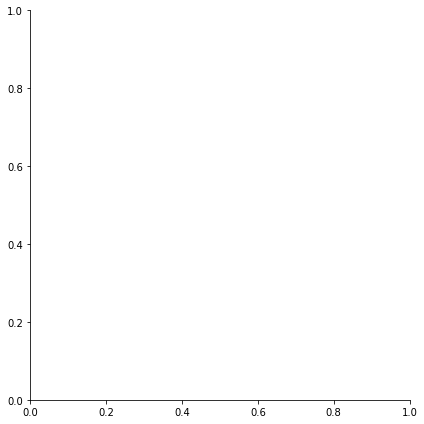

In [ ]:
sns.lmplot(x = '온실가스 배출량(tCO2)',y = '에너지 사용량(TJ)',data=df_result,fit_reg=False,size=6, hue='kind_of_work_label')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current

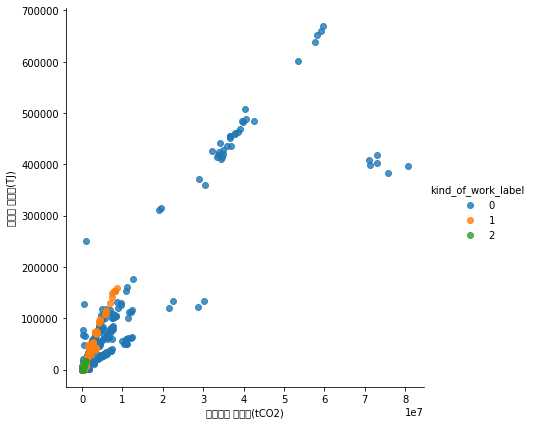

In [ ]:
sns.lmplot(x = '온실가스 배출량(tCO2)',y = '에너지 사용량(TJ)',data=df_result,fit_reg=False,size=6, hue='kind_of_work_label')
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 6,max_iter=10000,random_state=42)
kind_of_work_label2 = kmeans2.fit_predict(ftr_vect1)

In [ ]:
df_result['kind_of_work_label2'] = kind_of_work_label2

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current

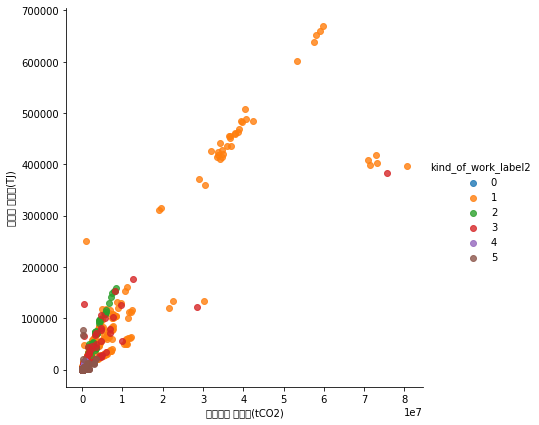

In [ ]:
sns.lmplot(x = '온실가스 배출량(tCO2)',y = '에너지 사용량(TJ)',data=df_result,fit_reg=False,size=6, hue='kind_of_work_label2')
plt.show()